In [1]:
pip install matplotlib tensorflow

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib (from versions: none)
ERROR: No matching distribution found for matplotlib

[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install numpy


  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl (12.9 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
pip install matplotlib



  Using cached matplotlib-3.10.8-cp310-cp310-win_amd64.whl (8.1 MB)
  Using cached pyparsing-3.3.1-py3-none-any.whl (121 kB)
  Using cached kiwisolver-1.4.9-cp310-cp310-win_amd64.whl (73 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached pillow-12.0.0-cp310-cp310-win_amd64.whl (7.0 MB)
  Using cached fonttools-4.61.1-cp310-cp310-win_amd64.whl (1.6 MB)
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl (221 kB)



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
pip install tensorflow


  Using cached tensorflow-2.20.0-cp310-cp310-win_amd64.whl (331.7 MB)
  Using cached requests-2.32.5-py3-none-any.whl (64 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached termcolor-3.3.0-py3-none-any.whl (7.7 kB)
  Using cached protobuf-6.33.2-cp310-abi3-win_amd64.whl (436 kB)
  Using cached ml_dtypes-0.5.4-cp310-cp310-win_amd64.whl (210 kB)
  Using cached grpcio-1.76.0-cp310-cp310-win_amd64.whl (4.7 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.15.1-cp310-cp310-win_amd64.whl (2.9 MB)
  Using cached gast-0.7.0-py3-none-any.whl (22 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl (5.5 MB)
  Using cached keras-3.12.0-py3-none-any.whl (1.5 MB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl (71 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl (135 kB)
  Using cached rich-14.2.0-py3-none-any.whl (243 kB)
  Using cached optree-0.18.0-cp310-cp310-win_amd64.whl (302 kB)
  Using cached idna-3.11-py3-none-any.whl (71 


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [11]:
X_train = np.loadtxt('input.csv',delimiter=',')
Y_train = np.loadtxt('labels.csv',delimiter=',')
X_test = np.loadtxt('input_test.csv',delimiter=',')
Y_test = np.loadtxt('labels_test.csv',delimiter=',')

In [12]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)
X_train = X_train/255.0
X_test = X_test/255.0

#Data augmentation to improve training
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    zoom_range=0.2
)

In [13]:
print("shape of X_train:",X_train.shape)
print("shape of Y_train:",Y_train.shape)
print("shape of X_test:",X_test.shape)
print("shape of Y_test:",Y_test.shape)

shape of X_train: (2000, 100, 100, 3)
shape of Y_train: (2000, 1)
shape of X_test: (400, 100, 100, 3)
shape of Y_test: (400, 1)


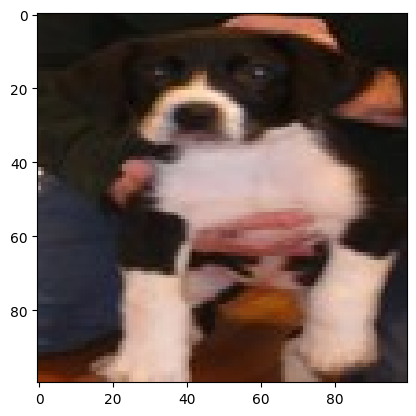

In [14]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [15]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

c:\Users\Deepi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input

model = Sequential()

model.add(Input(shape=(100, 100, 3)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))



In [17]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
model.fit(datagen.flow(X_train,Y_train,batch_size=32),
          epochs=30,
          validation_data=(X_test,Y_test),
          verbose=1)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 187ms/step - accuracy: 0.5005 - loss: 0.7102 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - accuracy: 0.5210 - loss: 0.6909 - val_accuracy: 0.5000 - val_loss: 0.6808
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - accuracy: 0.5510 - loss: 0.6848 - val_accuracy: 0.6075 - val_loss: 0.6750
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 176ms/step - accuracy: 0.5665 - loss: 0.6826 - val_accuracy: 0.5625 - val_loss: 0.6788
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - accuracy: 0.5600 - loss: 0.6819 - val_accuracy: 0.6075 - val_loss: 0.6723
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - accuracy: 0.5890 - loss: 0.6758 - val_accuracy: 0.6125 - val_loss: 0.6588
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 183ms/step - accuracy: 0.5995 - loss: 0.6647 - val_accuracy: 0.6325 - val_loss: 0.6633
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 188ms/step - accuracy: 0.6030 - loss: 0.6598 - val_accu

In [20]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7725 - loss: 0.5095


[0.5095125436782837, 0.7724999785423279]

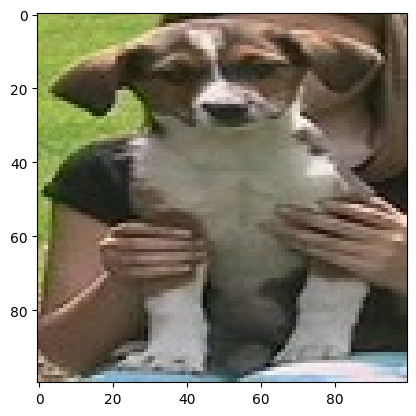

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Our model says it is a : dog


In [23]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if (y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)

In [24]:
model.save('model.h5')
print('Saved model to model.h5')

Saved model to model.h5
